# 3. Cluster analysis

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

def create_dendrogram(data, linkage_method='single', save=""):
    """Plot dendrogram
    
    Parameters:
    -----------
    data : array or DataFrame
        Data to be clustered
    linkage_method : str (optional)
        Method to use to construct the linkage matrix
        Choose between ['single', 'complete', 'average',
        'weighted', 'centroid', 'median', 'ward']
        For detailed information see 
        https://docs.scipy.org/doc/scipy-0.14.0/reference/ \
        generated/scipy.cluster.hierarchy.linkage.html
    save : str (optional)
        Name to use for figure file when saving
    """
    
    linkage_matrix = linkage(data, linkage_method)
    c, coph_dists = cophenet(linkage_matrix, pdist(data))
    print("Cophenetic correlation coefficient:", c)
    
    plt.figure(figsize=(25, 10))
    dendrogram(linkage_matrix, labels=data.index)
    if save != "":
        plt.savefig(f"../_FIGURES/{save}.pdf")
    plt.show()

Cophenetic correlation coefficient: 0.8820320039737471


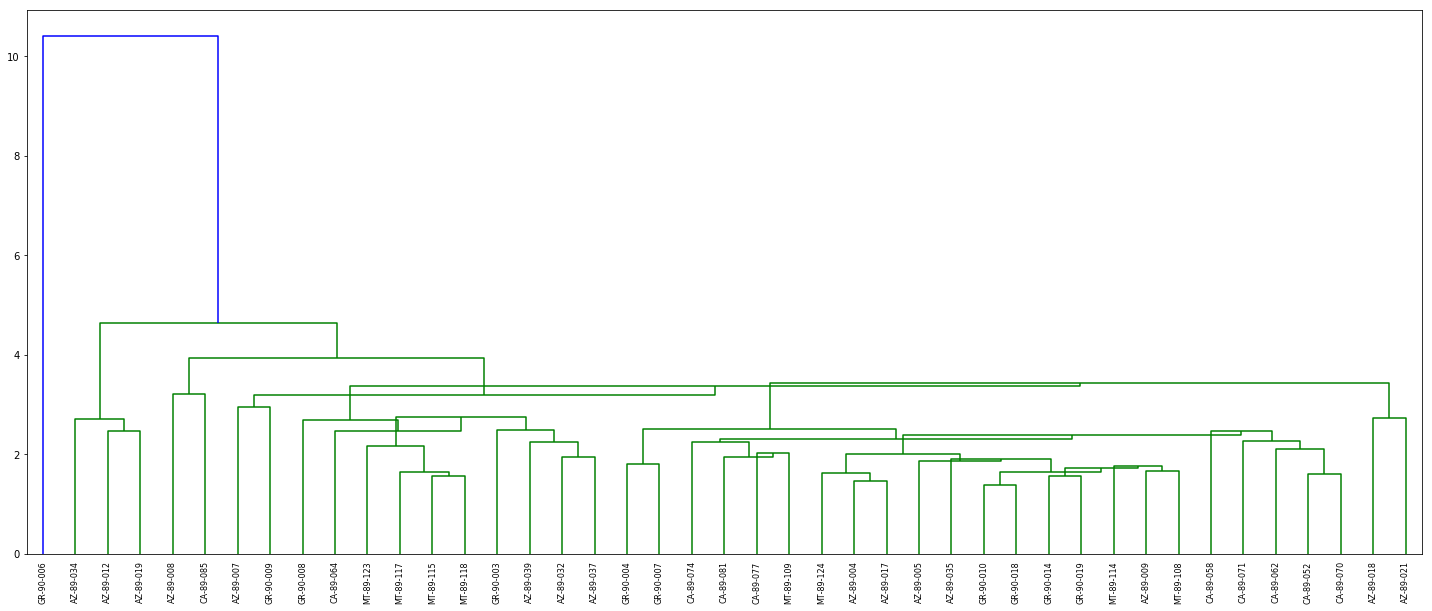

In [301]:
create_dendrogram(overview.drop("Pluton", axis=1).dropna(), linkage_method='centroid')

In [449]:


X = overview.drop("Pluton", axis=1).dropna()
Y = overview_Q.drop(na)

linkage_matrix = linkage(X, 'ward')

In [450]:


c, coph_dists = cophenet(linkage_matrix, pdist(X))
c

0.5416070543382778

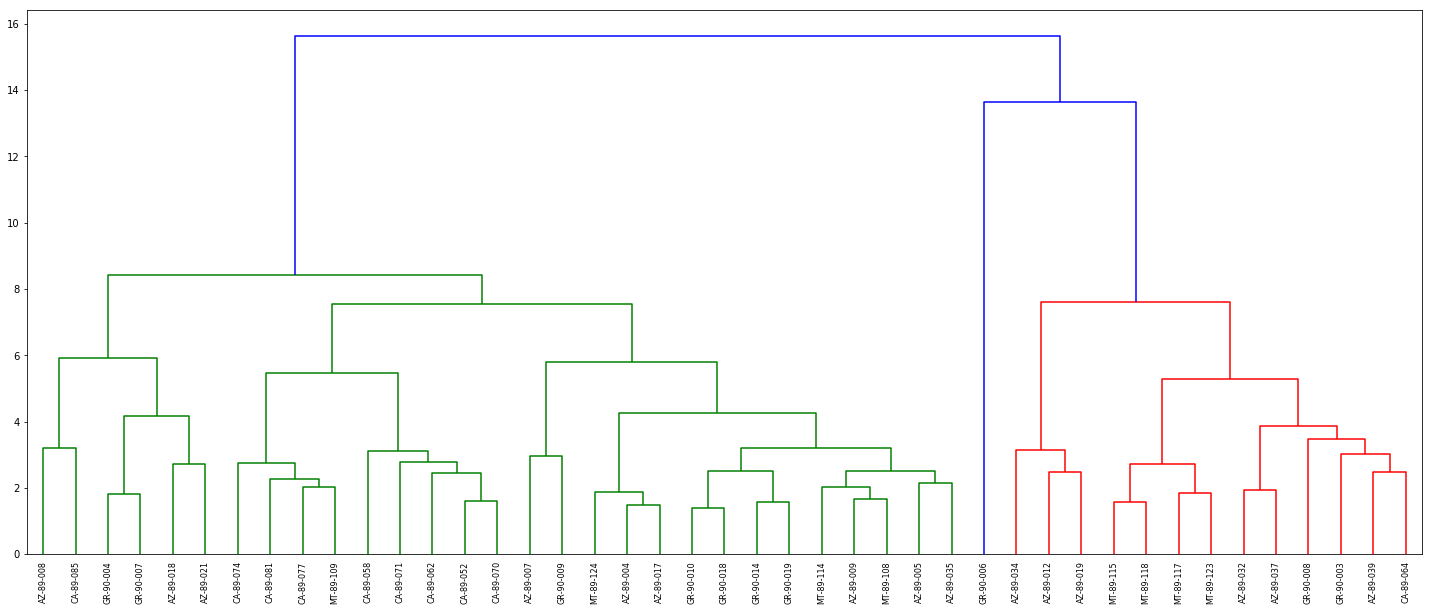

In [454]:
plt.figure(figsize=(25, 10))
dendrogram(linkage_matrix, labels=X.index)
plt.savefig("../_FIGURES/Dendrogram_all")
plt.show()